{1: 11, 2: 13, 3: 21, 4: 32, 5: 48, 6: 71, 7: 112, 8: 151, 9: 226, 10: 393, 11: 572, 12: 840, 13: 1249, 14: 1928, 15: 3084, 16: 4423, 17: 6707, 18: 10432, 19: 15492, 20: 24053, 21: 36192, 22: 54707, 23: 83905, 24: 125396, 25: 193899, 0: 8}


<function matplotlib.pyplot.show(close=None, block=None)>

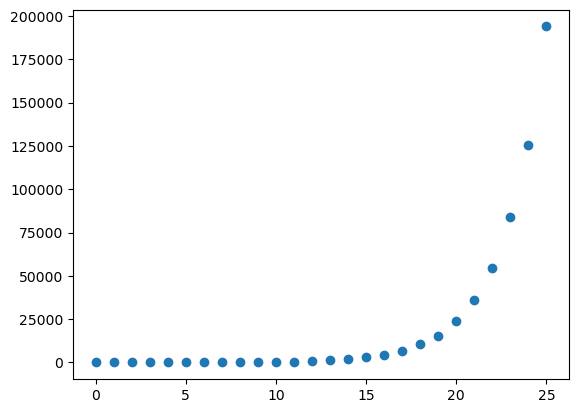

In [1]:
import matplotlib.pyplot as plt

input = '0 89741 316108 7641 756 9 7832357 91'
lst_input = [int(x) for x in input.split()]
len_for_count ={}

def modif_stones(lst, number, count):
    if count < number:
        new_lst = []
        for item in lst:
            if item == 0:
                new_lst.append(1)
            elif len(str(item))%2 == 0:
                item = str(item)
                mid = int(len(item) / 2)
                new_lst.append(int(item[:mid]))
                new_lst.append(int(item[mid:]))
            elif len(str(item))%2 != 0:
                new_lst.append(item*2024)
        count += 1
        len_for_count[count] = len(new_lst)
        return modif_stones(new_lst, number, count)
    else:
        return lst

first = modif_stones(lst_input, 25, 0)
len_for_count[0] = len(lst_input)
print(len_for_count)

plt.scatter(len_for_count.keys(), len_for_count.values())
# plt.yscale('log')
plt.show

In [2]:
from scipy.stats import linregress
import numpy as np

lst_x = []
lst_logs = []
for k,v in len_for_count.items():
    lst_logs.append(np.log(v))
    lst_x.append(k)
# result = linregress(len_for_count.keys(), lst_logs)




In [3]:
results = linregress(lst_x, lst_logs)

In [4]:
a = results.slope
b = results.intercept

y = np.exp(results.slope*75 + results.intercept)

In [5]:
y

156227779201231.66

In [6]:
results

LinregressResult(slope=0.4112375495611169, intercept=1.8395199642359277, rvalue=0.9997278860115246, pvalue=1.0866312632029336e-40, stderr=0.0019586923219673223, intercept_stderr=0.028552601765485748)